In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# SKLearn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import datasets

In [2]:
# Import data set
'''
features shape: (150, 2)
labels shape: (150, 1)
'''
iris = datasets.load_iris()
features = iris.data[:,:2]
labels = (iris.target != 0) * 1

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.5)
x_training = x_train[np.logical_not(np.isnan(x_train))].reshape(75,2)
y_training = y_train[np.logical_not(np.isnan(y_train))].reshape(75, 1)

In [3]:
# Sigmoid function. That maps any real number to a range of [0-1]
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [4]:
# In this cawse we use 'x' instead of 'x_trainig' because this functions
# could be used to predict the probability for new values (features)
def predict_probs(x, weights):
    return sigmoid(np.dot(x, weights))

In [5]:
def predict(x, weights, threshold=0.5):
    return predict_probs(x, weights) >= threshold

In [6]:
# Cost function
def cost_evaluation(hipotesis, y_training, weights, bias):
    number_of_training_rows = np.shape(y_training)[0]
    
    #print('Hipotesis: {}'.format(hipotesis))
    #print('1 - y_training: {}'.format((1 - y_training)))
    #print('(1 - hipotesis) + bias: {}'.format((1 - hipotesis)))
    #print('np.log((1 - hipotesis)): {}'.format(np.log((1 - hipotesis))))
    #print('bias: {}'.format(bias))
    #print('np.log((1 - hipotesis) + bias): {}'.format(np.log((1 - hipotesis))))
    
    #Take the error when label=1 (y=1)
    class1_cost = -y_training*np.log(hipotesis + bias)
    
    # Calculate the cost when the label=0 (y=0)
    class2_cost  = (1 - y_training)*np.log((1 - hipotesis) + bias)
    
     # Take the sum of both costs
    cost_contribution = class1_cost - class2_cost
    
    # Take the average cost
    cost = np.sum(cost_contribution) / number_of_training_rows
    
    return cost

In [7]:
# Gradient descent
def gradient_descent(hipotesis, x_training, y_training, weights, learning_rate, bias):
    number_of_training_rows = np.shape(y_training)[0]
    
    #print('np.transpose(x_training) shape: {}'.format(np.transpose(x_training).shape))
    #print('hipotesis shape: {}'.format(hipotesis.shape))
    #print('y_training shape: {}'.format(y_training.shape))
    #print('hipotesis - y_training shape: {}'.format((hipotesis - y_training).shape))
    
    gradient = np.dot(np.transpose(x_training), (hipotesis - y_training)) / number_of_training_rows
    
    #print('gradient shape: {}'.format(gradient.shape))
    db = np.sum(hipotesis - y_training) / number_of_training_rows
    
    # Update weights
    weights -= learning_rate * gradient
    #bias -= (learning_rate * db) 
    
    return weights
    

In [8]:
def training(x_training, y_training, weights, learning_rate, iterations, bias):
    cost_history = []
    
    for i in range(iterations):
        z = np.dot(x_training, weights)
        #print('z shape: {}'.format(z.shape))
        hipotesis = sigmoid(z)
        
        # Gradient descent to update weights
        weights = gradient_descent(hipotesis, x_training, y_training, weights, learning_rate, bias)
        
        # Evaluate the cost with the new values of weights
        cost = cost_evaluation(hipotesis, y_training, weights, bias)
        cost_history.append(cost)
        
        # Log Progress
        if i % 1000 == 0:
            print("iterations: {} cost: {}".format(i,cost))
            
    return weights, cost_history
        
        

In [9]:
# Call training
m,n = features.shape
weights = np.ones(n) # Inital colomn vector of theta
weights = weights.reshape(2,1)
learning_rate = 0.001
iterations = 50000
bias = 0.0001
print('x_training shape: {}'.format(x_training.shape))
print('weights shape: {}'.format(weights.shape))
weights, cost_history = training(x_training, y_training, weights, learning_rate, iterations, bias)
print('weights: {}'.format(weights))
#print('cost_history: {}'.format(cost_history))

x_training shape: (75, 2)
weights shape: (2, 1)
iterations: 0 cost: 2.235918619887442
iterations: 1000 cost: 0.6176073700961126
iterations: 2000 cost: 0.5718617520849595
iterations: 3000 cost: 0.5316806759003466
iterations: 4000 cost: 0.4959878762206058
iterations: 5000 cost: 0.4643174856431971
iterations: 6000 cost: 0.4362073145031771
iterations: 7000 cost: 0.4112207689911645
iterations: 8000 cost: 0.3889594405839579
iterations: 9000 cost: 0.3690684628226519
iterations: 10000 cost: 0.3512369700010635
iterations: 11000 cost: 0.3351956368426016
iterations: 12000 cost: 0.32071274078269685
iterations: 13000 cost: 0.30758968870351117
iterations: 14000 cost: 0.2956565666033434
iterations: 15000 cost: 0.28476800816676473
iterations: 16000 cost: 0.27479951271177677
iterations: 17000 cost: 0.2656442460738326
iterations: 18000 cost: 0.25721030575617915
iterations: 19000 cost: 0.24941840682553046
iterations: 20000 cost: 0.24219993603898415
iterations: 21000 cost: 0.2354953213106027
iterations: 2

In [10]:
# Prediction
prediction = predict(x_test, weights)
print(prediction)

[[ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]]


Text(0, 0.5, 'cost')

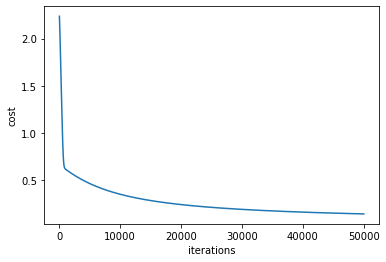

In [11]:
# Visualice the cost fuction for each iteration in the batch gradient descend algorithm
iterations_range = list(range(0,iterations))
plt.plot(iterations_range, cost_history, label='linear')  # Plot some data on the (implicit) axes.
plt.xlabel('iterations')
plt.ylabel('cost')

In [12]:
# Evaluate the accuracy of the model
y_test_boolean = y_test >= 0.5

print("p: {}".format(prediction.ravel()))
print("t: {}".format(y_test_boolean))

print(accuracy_score(y_test_boolean, prediction))

p: [ True False False False  True  True  True False  True  True False False
  True  True  True False False  True  True  True  True  True  True  True
  True False  True  True  True False  True False False False False  True
  True False False  True  True  True False  True  True  True  True  True
 False False False  True False  True  True  True  True False False False
  True  True  True False  True False  True  True False False  True False
  True  True  True]
t: [ True False False False  True  True  True False  True  True False False
  True  True  True False False  True  True  True  True  True  True  True
  True False  True  True  True False  True False False False False  True
  True False False  True  True  True False  True  True  True  True  True
 False False False  True False  True  True  True  True False False False
  True  True  True False  True False  True  True False False  True False
  True  True  True]
1.0


In [13]:
# With sklearn
lr_model = LogisticRegression(solver = 'lbfgs')

# Train model
lr_model.fit(x_training, y_training)

# Predict for
lr_preds = lr_model.predict(x_test)
#lr_preds = lr_preds.tolist()

lr_preds_boolean = lr_preds >= 0.5

print(lr_preds)

print(accuracy_score(y_test_boolean.ravel(), lr_preds_boolean.ravel()))

# Use score method to get accuracy of model
score = lr_model.score(x_training, y_training)
print(score)

[1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1
 0 0 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1
 1]
1.0
1.0


C:\Users\osciv\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
